# get data from google images

First scroll to load the number of images you want then run this code in the console
```javascript
const imgs=Array.from(document.querySelectorAll('.rg_i')); 
const sleep=ms=>new Promise(r=>setTimeout(r,ms));
var urls=[];
for (let i=0;i<imgs.length;i++){
    imgs[i].click();
    await sleep(1000);
    full_img=document.querySelector("img.n3VNCb.KAlRDb");
    if (full_img!=null)
    	urls.push( full_img.getAttribute("src") );
}
```
and then run this code
```javascript
window.open('data:text/csv;charset=utf-8,' + escape(urls.join("\n")));
```

In [ ]:
labels=['alligator','crocodile']
# data=pd.read_csv(f"{labels[0]}.csv")
list_of_urls=[]
for label in labels:
  with open(f"{label}.csv",'r') as f:
    list_of_urls.append(f.read().split("\n"))

In [ ]:
for i,label in enumerate(labels):
  l2=[list_of_urls[i][0]]
  for j in list_of_urls[i][1:]:
      if j not in l2:
        l2.append(j)
      else:
        print(j,"is duplicate.")
  list_of_urls[i]=l2

In [ ]:
len(list_of_urls[0]),len(list_of_urls[1])

(192, 231)

In [ ]:
import requests
import shutil
import os
from tqdm import tqdm

data_dir="dataset/"
if os.path.exists(data_dir): shutil.rmtree(data_dir)
os.mkdir(data_dir)
for i,label in enumerate(labels):
  img_dir=data_dir+label+'/'
  os.mkdir(img_dir)
  for j in tqdm(range(len(list_of_urls[i]))):
    try:
      r=requests.get(list_of_urls[i][j],stream=True,timeout=10)
      file_name=img_dir+f'{j}.jpg'
      if r.status_code==200:
        with open(file_name,'wb') as f:
          r.raw.decode_content = True
          shutil.copyfileobj(r.raw,f)
      else:
        print("Failed to get :",list_of_urls[0][0])
    except:
      print("Error")
    

# Get data from Bing

In [ ]:
pip install git+https://github.com/cwerner/fastclass.git>&NULL

In [ ]:
import os
import pandas as pd

if os.path.exists("dataset.csv"): os.remove("dataset.csv")
df=pd.DataFrame({"searchterm":["crocodile","alligator"],"exclude":["alligator","crocodile"]})
# df=pd.DataFrame({"searchterm":["cat","dog"],"exclude":["",""]})
df.to_csv("dataset.csv",mode="a",header=True,index=False)

In [ ]:
!head -n 3 dataset.csv

searchterm,exclude
crocodile,alligator
alligator,crocodile


In [ ]:
! fcd -c BING -s 299 dataset.csv   # working !

In [ ]:
# !pip install google_images_download >&NULL

# get data from Kaggle

In [ ]:
!kaggle datasets download -d rrrohit/crocodile-gharial-classification-fastai

In [35]:
# get kaggle.json
!cp "kaggle.json" "/root/.kaggle/kaggle.json"

In [3]:
!kaggle datasets download -d rrrohit/crocodile-gharial-classification-fastai

 94% 396M/420M [00:03<00:00, 164MB/s]
100% 420M/420M [00:03<00:00, 124MB/s]


In [4]:
! unzip "/content/crocodile-gharial-classification-fastai.zip" >&NULL
!rm NULL

In [5]:
# shutil.rmtree("dataset/")

In [6]:
import shutil
import os

os.mkdir("dataset/")
shutil.move('alligator','dataset/alligator')
shutil.move('crocodile','dataset/crocodile')
shutil.move('gharial','dataset/gharial')

'dataset/gharial'

In [9]:
import cv2
from fastai.vision.all import get_image_files,Path

all_imgs_list=get_image_files(Path("dataset/"))
for i in range(len(all_imgs_list)):
  try:
    img_path=str(all_imgs_list[i])
    img=cv2.imread(img_path)
    img.shape
  except:
    print("bad image path:",img_path)
    os.remove(img_path)
    

bad image path: dataset/crocodile/1756250535amazing-crocodile-alligator-gif-2.gif
bad image path: dataset/crocodile/This-ancient-E28098terror-crocodileE28099-had-teeth-the-size-of-bananas-scaled.jpg
bad image path: dataset/gharial/tumblr_mimyma5Xkj1r2tfgvo8_1280.png
bad image path: dataset/gharial/tumblr_lwr9c6ulrc1qh1q7vo1_1280.jpg
bad image path: dataset/gharial/L.A.-Zoo-welcomes-rare-crocodilian-from-Singapore-Zoo-pic.gif
bad image path: dataset/gharial/Untitled-design-2-4.jpg
bad image path: dataset/gharial/Gharial_88e5ee_6833741.jpg
bad image path: dataset/gharial/Uttarakhand.jpg
bad image path: dataset/gharial/papoGavial10_zps11a04518.jpg
bad image path: dataset/gharial/tumblr_n3o7yjHg7Z1r9x8dno2_1280.jpg


In [10]:
bad_imgs_list=['dataset/alligator/EW_KH_Southern_Alligator_lizard_20100702_4761348534_81b4c9a1ae_o.jpg',
 'dataset/crocodile/Full-Grown-Crocodile-Skink.jpg',
 'dataset/crocodile/crocodile-2.jpg',
 'dataset/crocodile/o-SOUTH-BEACH-CROCODILE-facebook.jpg',
 'dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg',
 'dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg',
 'dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg']
print("Bad_images:",len(bad_imgs_list))
for bad_img_path in bad_imgs_list:os.remove(bad_img_path) 

Bad_images: 7


In [93]:
print("total number of images now:",len(get_image_files(Path("dataset/"))))

total number of images now: 789


# Model

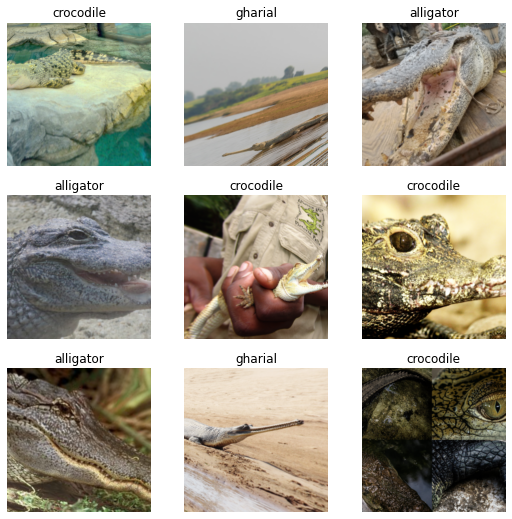

In [67]:
from fastai.vision.all import *
np.random.seed(23)

all_imgs_list=get_image_files(Path("dataset/"))
db=DataBlock(blocks=[ImageBlock,CategoryBlock],
              item_tfms=Resize(299),
              batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms(mult=2)],
              get_y=lambda x:str(x).rsplit("/",1)[0].rsplit("/")[1],
             )
dls=db.dataloaders(source=all_imgs_list,shuffle=True)
dls.train.show_batch()

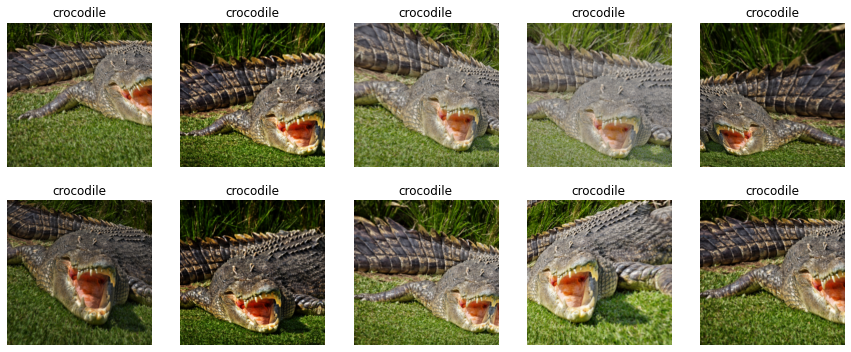

In [68]:
dls.train.show_batch(max_n=10,nrows=2,unique=True)

In [69]:
learn=vision_learner(dls,models.resnet34,metrics=[error_rate])

In [70]:
learn.fit_one_cycle(8)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

In [71]:
learn.unfreeze()
# learn.lr_find()

In [72]:
learn.fit_one_cycle(n_epoch=8,lr_max=slice(1e-5,3e-4))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

In [74]:
learn.save("stage_2")

Path('models/stage_2.pth')

In [77]:
learn.load('stage_2')

In [78]:
learn.fit_one_cycle(n_epoch=8,lr_max=slice(1e-5,3e-4),cbs=[EarlyStoppingCallback(patience=2),SaveModelCallback(fname="best_model")])

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 0 with valid_loss value: 0.44789695739746094.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 1 with valid_loss value: 0.413241446018219.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


No improvement since epoch 1: early stopping


In [79]:
learn.load("best_model")
learn.validate()

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(#2) [0.413241446018219,0.1146496832370758]

In [80]:
interp=ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


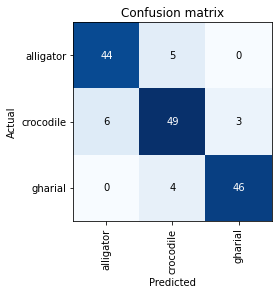

In [81]:
interp.plot_confusion_matrix()

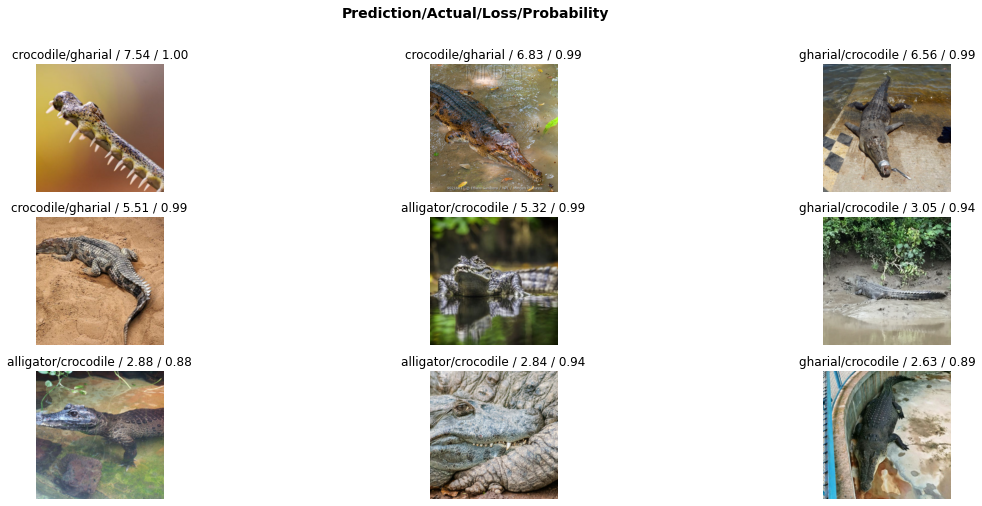

In [82]:
interp.plot_top_losses(10,figsize=(4*5,4*2))

In [83]:
interp.print_classification_report()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

   alligator       0.88      0.90      0.89        49
   crocodile       0.84      0.84      0.84        58
     gharial       0.94      0.92      0.93        50

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.89       157
weighted avg       0.89      0.89      0.89       157



In [84]:
dls.vocab

['alligator', 'crocodile', 'gharial']

crocodile:0.8094262480735779


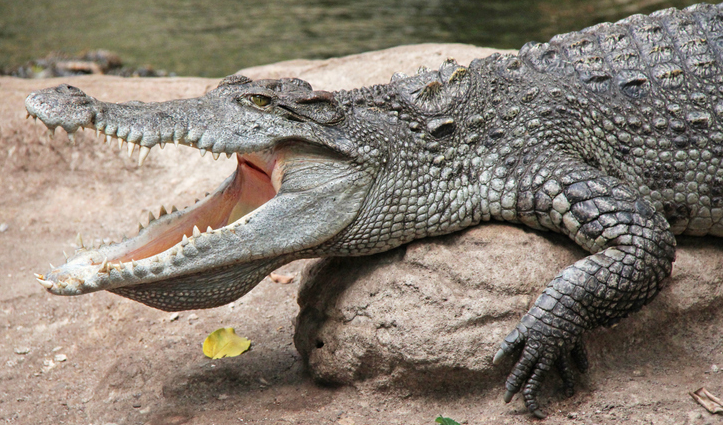

In [85]:
file_name="croc.png"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

alligator:0.9056493639945984


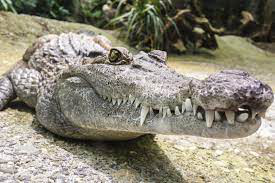

In [86]:
file_name="croc2.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

alligator:0.9998679161071777


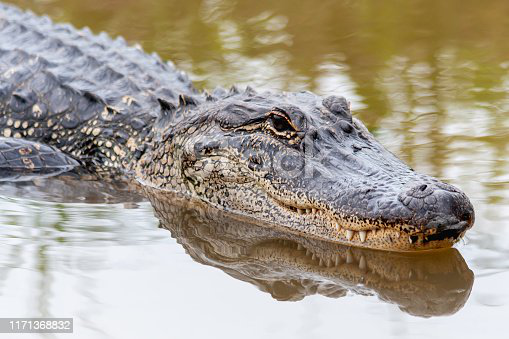

In [87]:
file_name="alliga.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

alligator:0.9962116479873657


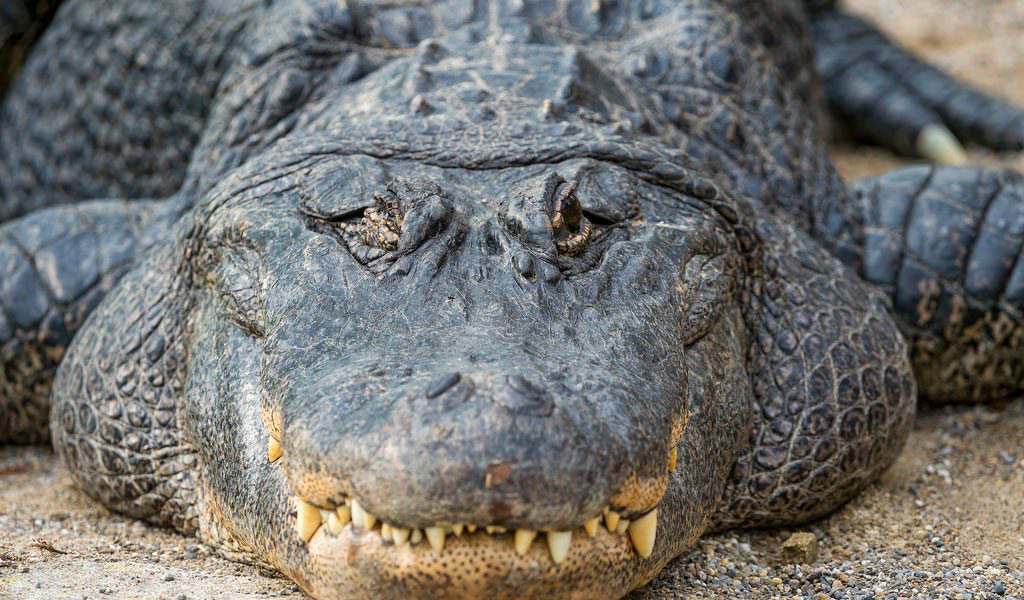

In [88]:
file_name="alliga2.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.9999951124191284


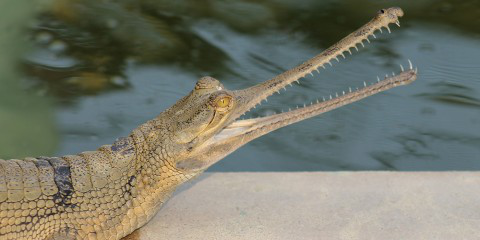

In [89]:
file_name="gharial.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.913733184337616


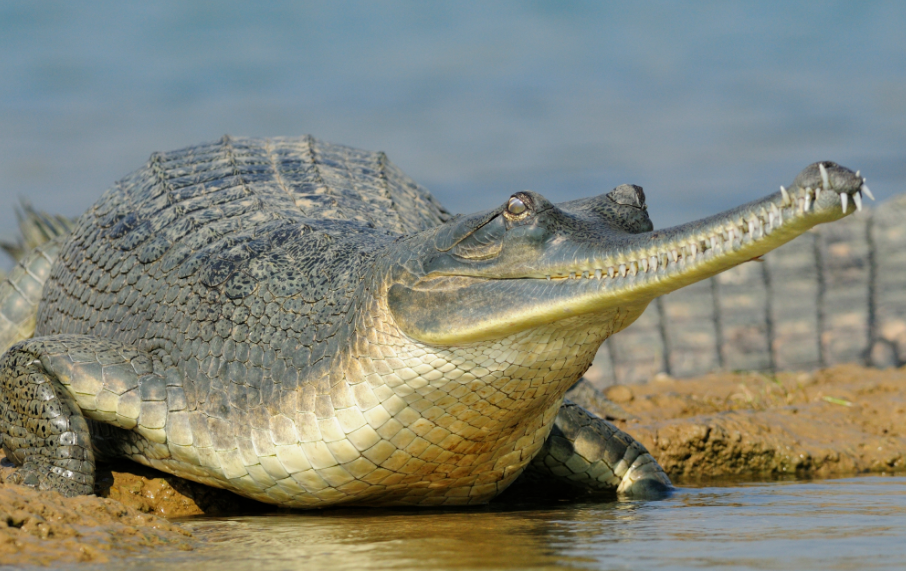

In [90]:
file_name="gharial2.png"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.9999173879623413


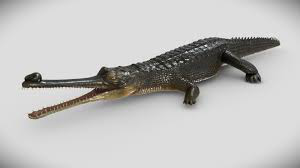

In [91]:
file_name="gharial3.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.9924402236938477


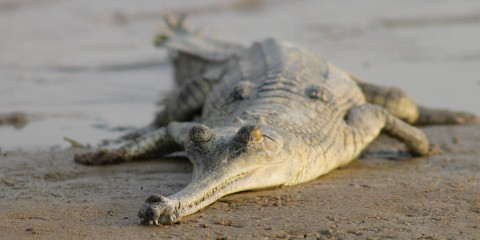

In [92]:
file_name="gharial4.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

# cleaning dataset

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
    if cleaner.fns[idx] not in bad_imgs_list:
        bad_imgs_list.append(cleaner.fns[idx])
        print(cleaner.fns[idx],"deleted.")

dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg deleted.
dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg deleted.
dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg deleted.


In [ ]:
bad_imgs_list

[Path('dataset/alligator/EW_KH_Southern_Alligator_lizard_20100702_4761348534_81b4c9a1ae_o.jpg'),
 Path('dataset/crocodile/Full-Grown-Crocodile-Skink.jpg'),
 Path('dataset/crocodile/crocodile-2.jpg'),
 Path('dataset/crocodile/o-SOUTH-BEACH-CROCODILE-facebook.jpg'),
 Path('dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg'),
 Path('dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg'),
 Path('dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg')]

In [ ]:
list(map(str,bad_imgs_list))

['dataset/alligator/EW_KH_Southern_Alligator_lizard_20100702_4761348534_81b4c9a1ae_o.jpg',
 'dataset/crocodile/Full-Grown-Crocodile-Skink.jpg',
 'dataset/crocodile/crocodile-2.jpg',
 'dataset/crocodile/o-SOUTH-BEACH-CROCODILE-facebook.jpg',
 'dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg',
 'dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg',
 'dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg']